In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from matplotlib.colors import ListedColormap

In [2]:
cmp1 = ListedColormap(['navy', 'orangered'])
cmp2 = ListedColormap(['green', 'orange'])

In [3]:
dataset = torch.load('pca/zinc.pkl')
ds = dataset[:1000]

In [4]:
encodings = list()
for i, data in enumerate(ds):
    encodings.append(torch.mean(data.pestat_GPSE, dim=0).numpy())
encodings = np.array(encodings)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(encodings)
print(pca.explained_variance_ratio_)

[0.26934028 0.11012325]


In [6]:
wl_34_dataset = torch.load('pca/wl_rand.pt')
wl_34_encodings = list()
wl_34_labels = list()
for i, data in enumerate(wl_34_dataset):
    wl_34_encodings.append(torch.mean(data.pestat_GPSE, dim=0).numpy())
    wl_34_labels.append(data.y)
wl_encodings = np.array(wl_34_encodings)

/Users/semo/PycharmProjects/pretrained-pe/venv/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.0) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


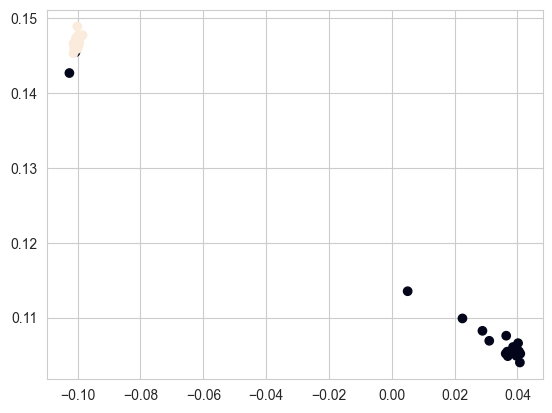

In [7]:
wl_34_pca = pca.transform(wl_encodings)
plt.scatter(wl_34_pca[:,0], wl_34_pca[:,1], c=wl_34_labels)

In [8]:
wl1_dataset = torch.load('pca/wl_ones.pt')
wl1_encodings = list()
wl1_labels = list()
for i, data in enumerate(wl1_dataset):
    wl1_encodings.append(torch.mean(data.pestat_GPSE, dim=0).numpy())
    wl1_labels.append(data.y)
wl1_encodings = np.array(wl1_encodings)

(-0.10252644985067845, -0.10252544985067845)

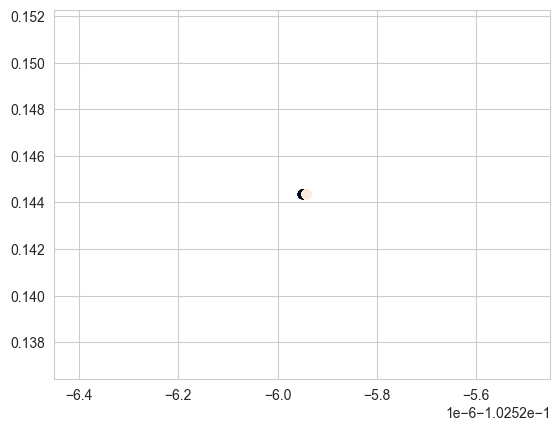

In [9]:
wl1_pca = pca.transform(wl1_encodings)
plt.scatter(wl1_pca[:,0], wl1_pca[:,1], c=wl_34_labels)
plt.xlim(plt.xlim()[0]-0.0000005, plt.xlim()[0]+0.0000005)

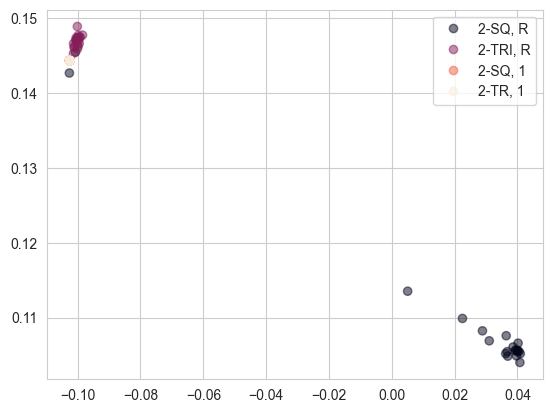

In [10]:
fig, ax = plt.subplots()
wl_ds = np.concatenate((wl_34_pca, wl1_pca), axis=0)
wl1_labels = [x + 2 for x in wl_34_labels]
y = wl_34_labels + wl1_labels
scatter = ax.scatter(wl_ds[:,0], wl_ds[:,1], c=y, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=['2-SQ, R', '2-TRI, R', '2-SQ, 1', '2-TR, 1'])

In [11]:
wl_56_dataset = torch.load('pca/wl_56_rand.pt')
wl_56_encodings = list()
wl_56_labels = list()
for i, data in enumerate(wl_56_dataset):
    wl_56_encodings.append(torch.mean(data.pestat_GPSE, dim=0).numpy())
    wl_56_labels.append(data.y)
wl_56_encodings = np.array(wl_56_encodings)
wl_56_labels = np.array(wl_56_labels)

/var/folders/2l/lk6pspv556bbkvwsycxbpkj40000gn/T/ipykernel_24261/2067848120.py:17: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


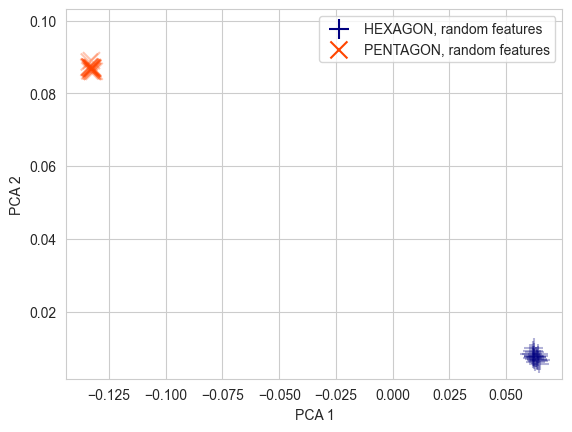

In [12]:
wl_56_pca = pca.transform(wl_56_encodings)
y0, y1 = np.where(wl_56_labels == 0), np.where(wl_56_labels == 1)

fig, ax = plt.subplots()
ax.scatter(wl_56_pca[y0, 0], wl_56_pca[y0, 1], c=wl_56_labels[y0], cmap=cmp1, marker='+', alpha=0.3, s=200)
ax.scatter(wl_56_pca[y1, 0], wl_56_pca[y1, 1], c=wl_56_labels[y1], cmap=cmp1.reversed(), marker='x', alpha=0.3, s=150)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

xlims = ax.get_xlim()
ylims = ax.get_ylim()
ax.set_ylim(ylims[0], ylims[1]+0.01)
ylims = ax.get_ylim()


leg = plt.legend(labels=['HEXAGON, random features', 'PENTAGON, random features'])
for lh in leg.legendHandles:
    lh.set_alpha(1)
plt.savefig('plots/wl_56R.pdf')

In [13]:
wl_56_1_dataset = torch.load('pca/wl_56_ones.pt')
wl_56_1_encodings = list()
wl_56_1_labels = list()
for i, data in enumerate(wl_56_1_dataset):
    wl_56_1_encodings.append(torch.mean(data.pestat_GPSE, dim=0).numpy())
    wl_56_1_labels.append(data.y)
wl_56_1_encodings = np.array(wl_56_1_encodings)
wl_56_1_labels = np.array(wl_56_1_labels)

/var/folders/2l/lk6pspv556bbkvwsycxbpkj40000gn/T/ipykernel_24261/1676471370.py:12: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


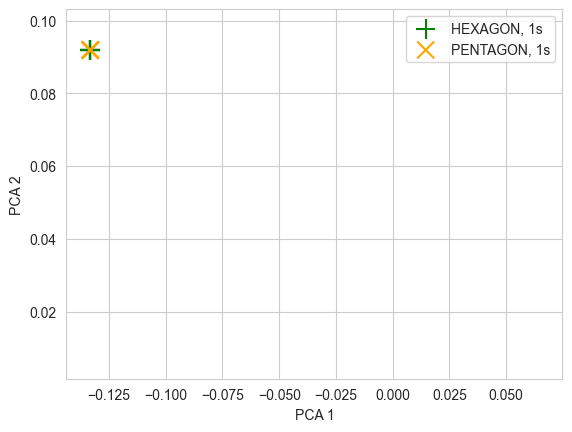

In [14]:
wl_56_1_pca = pca.transform(wl_56_1_encodings)
y0, y1 = np.where(wl_56_1_labels == 0), np.where(wl_56_1_labels == 1)

fig, ax = plt.subplots()
ax.scatter(wl_56_1_pca[y0, 0], wl_56_1_pca[y0, 1], c=wl_56_labels[y0], cmap=cmp2, marker='+', alpha=0.3, s=200)
ax.scatter(wl_56_1_pca[y1, 0], wl_56_1_pca[y1, 1], c=wl_56_labels[y1], cmap=cmp2.reversed(), marker='x', alpha=0.3, s=150)
ax.set_xlim(xlims)
ax.set_ylim(ylims)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
leg = plt.legend(labels=['HEXAGON, 1s', 'PENTAGON, 1s'])
for lh in leg.legendHandles:
    lh.set_alpha(1)
plt.savefig('plots/wl_561.pdf')

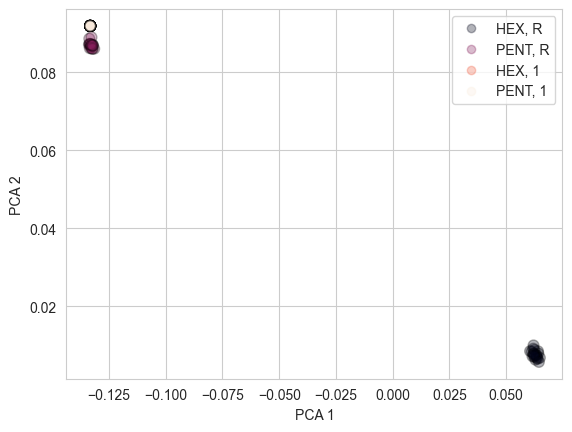

In [15]:
fig, ax = plt.subplots()
wl_ds = np.concatenate((wl_56_pca, wl_56_1_pca), axis=0)
wl_56_1_labels = [x + 2 for x in wl_56_labels]
y = np.concatenate((wl_56_labels, wl_56_1_labels), axis=0)
scatter = ax.scatter(wl_ds[:,0], wl_ds[:,1], c=y, alpha=0.3, s=60, edgecolor='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['HEX, R', 'PENT, R', 'HEX, 1', 'PENT, 1'])
plt.savefig('wl_Rvs1.pdf')

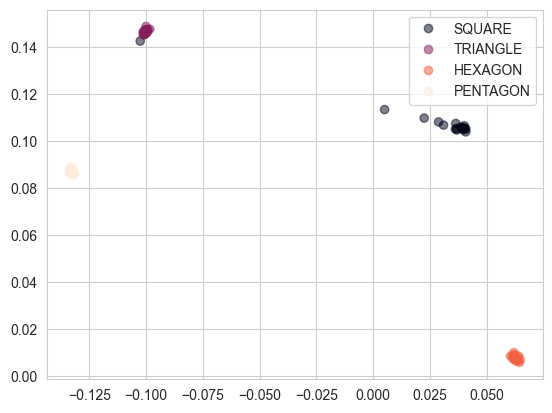

In [16]:
fig, ax = plt.subplots()
wl_ds = np.concatenate((wl_34_pca, wl_56_pca), axis=0)
wl_56_labels_2 = [x + 2 for x in wl_56_labels]
y = wl_34_labels + wl_56_labels_2
scatter = ax.scatter(wl_ds[:,0], wl_ds[:,1], c=y, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=['SQUARE', 'TRIANGLE', 'HEXAGON', 'PENTAGON'])

In [17]:
y_np = np.expand_dims(np.array(y), 1)
wl_pair = np.expand_dims(np.concatenate((np.zeros(40), np.ones(40)), axis=0), 1)
wl_np = np.concatenate((wl_ds, y_np, wl_pair), axis=1)

In [18]:
wl_df = pd.DataFrame(data=wl_np, columns=['PCA 1', 'PCA 2', 'class', 'exp'])
exp_dict = {0: "3-4", 1: "5-6"}
class_dict = {0: 'SQUARE', 1: 'TRIANGLE', 2: 'HEXAGON', 3: 'PENTAGON'}
wl_df = wl_df.replace({"class": class_dict})
wl_df = wl_df.replace({"exp": exp_dict})

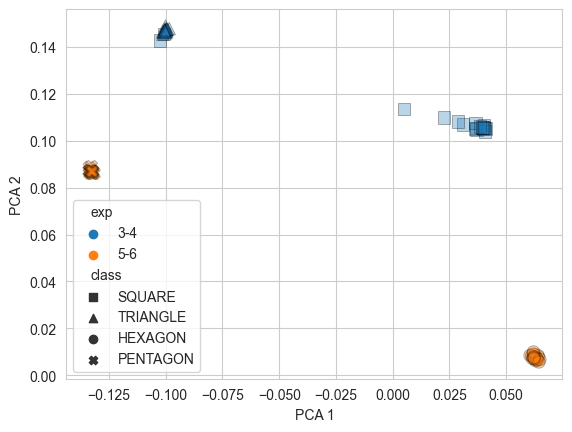

In [19]:
wl1 = sns.scatterplot(data=wl_df, x="PCA 1", y="PCA 2", hue="exp", style="class", s=80, edgecolor="black", markers=[',', '^', 'o','X'], alpha=0.3)
plt.savefig('wl_expclass.pdf')

In [20]:
wl_df = pd.DataFrame(data=wl_np, columns=['PCA 1', 'PCA 2', 'class', 'exp'])
exp_dict = {0: "3-4", 1: "5-6"}
class_dict = {0: 'SQUARE', 1: 'TRIANGLE', 2: 'HEXAGON', 3: 'PENTAGON'}
wl_df = wl_df.replace({"class": class_dict})
wl_df = wl_df.replace({"exp": exp_dict})

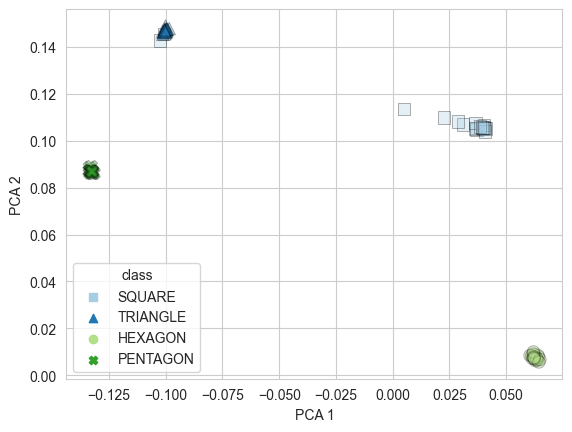

In [21]:
sns.scatterplot(data=wl_df, x="PCA 1", y="PCA 2", hue="class", style="class", s=80, edgecolor="black", palette='Paired', markers=[',', '^', 'o','X'], alpha=0.3)
plt.savefig('wl_class.pdf')